# Make some choclate soup

In this project I will use Beautiful Soup to scrape a website full of ratings of different choclates from different countries. The ratings are on a scale from 1 - 5, where 1 is the worst score you can get. 

These are the questions I will be answering: 
- Where are the best cocoa beans grown? 
- Which countries produce the highest-rated bars? 
- What’s the relationship between cocoa solids percentage and rating?



In [62]:
import seaborn as sns
from bs4 import BeautifulSoup
import requests
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Scraping the website

In [63]:
webpage_response = requests.get('https://content.codecademy.com/courses/beautifulsoup/cacao/index.html')
webpage = webpage_response.content
soup = BeautifulSoup(webpage, "html.parser")

In [135]:
#print(soup.prettify())

## Creating a dataframe 

In [65]:
soup_ratings = soup.find_all(attrs={"class": "Rating"})
ratings = [float(soup_rating.get_text()) for soup_rating in soup_ratings[1:]]

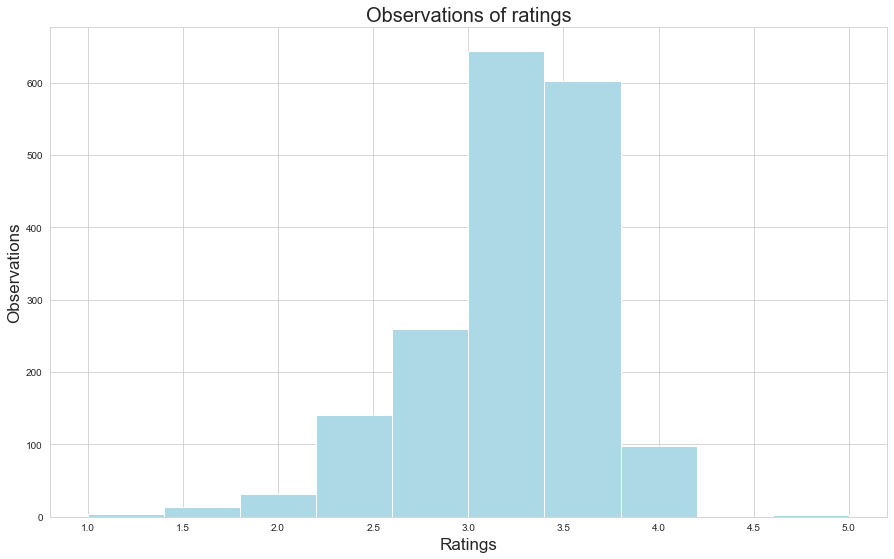

In [127]:
plt.subplots(figsize=(15, 9))
plt.hist(x=ratings, color='lightblue')

plt.title('Observations of ratings', size = 20)
# Horizontal axis Label
plt.xlabel('Ratings', size = 17)
# Vertical axis Label
plt.ylabel('Observations', size = 17)

plt.show()

In [67]:
soup_companies = soup.select(".Company")
companies = [soup_company.get_text() for soup_company in soup_companies[1:]]

In [68]:
soup_percent = soup.select(".CocoaPercent")
percents = [float(percent.get_text().strip('%')) for percent in soup_percent[1:]]

In [107]:
soup_origin = soup.select(".Origin")
origins = [origin.get_text() for origin in soup_origin[1:]]

In [130]:
soup_location = soup.select(".CompanyLocation")
locations = [location.get_text() for location in soup_location[1:]]

In [133]:
soup_bean_origin = soup.select(".BroadBeanOrigin")
bean_origin = [origin.get_text() for origin in soup_bean_origin[1:]]

In [139]:
d = {'Companies':companies, 'CompanyLocation':locations, 'Ratings':ratings, 'CocoaPercentage': percents, 'Origin':origins, 'BroadBeanOrigin': bean_origin}
df = pd.DataFrame.from_dict(d)
df.head()


,Companies,CompanyLocation,Ratings,CocoaPercentage,Origin,BroadBeanOrigin
0,A. Morin,France,3.75,63.0,Agua Grande,Sao Tome
1,A. Morin,France,2.75,70.0,Kpime,Togo
2,A. Morin,France,3.00,70.0,Atsane,Togo
3,A. Morin,France,3.50,70.0,Akata,Togo
4,A. Morin,France,3.50,70.0,Quilla,Peru


# Analyzing the data

## The relationship between cocoa solids percentage and rating

In [1]:
# plot bg
sns.set_style("whitegrid")

#Size of the plot
x = df['CocoaPercentage']
y = df['Ratings']
cmap = sns.cubehelix_palette(as_cmap=True)

f, ax = plt.subplots(figsize=(15, 9))
points = ax.scatter(x, y, c=y, s=50, cmap=cmap)
# Title of the graph
plt.title('Scatterplot of the ratings vs. the cocoa percentage', size = 20)

# Horizontal axis Label
plt.xlabel('Cocoa percentage', size = 17)
# Vertical axis Label
plt.ylabel('Ratings', size = 17)

NameError: name 'sns' is not defined

From the plot above one can say that people mostly likes choclate with a coca percentage between ~60% to ~85%

Text(0, 0.5, 'Ratings')

<Figure size 432x288 with 0 Axes>

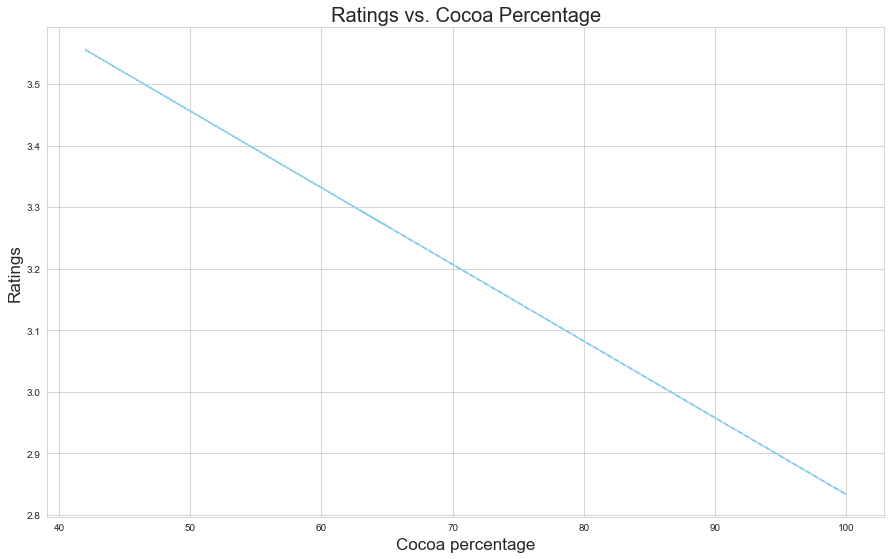

In [114]:
plt.clf()
plt.subplots(figsize=(15, 9))
z = np.polyfit(df.CocoaPercentage, df.Ratings, 1)
line_function = np.poly1d(z)
plt.plot(df.CocoaPercentage, line_function(df.CocoaPercentage), "r--", color='#87CEE')
# Title of the graph
plt.title('Ratings vs. Cocoa Percentage', size = 20)
# Horizontal axis Label
plt.xlabel('Cocoa percentage', size = 17)
# Vertical axis Label
plt.ylabel('Ratings', size = 17)

Here is a regression model of the scatter plot above. From this one can see that the lower the cocoa percentage is, the higher the rating is. 


## Countries which produces the highest-rated bars

In [140]:
avg_rating_df = df.groupby(by='CompanyLocation').Ratings.mean()
avg_rating_df.nlargest(10)

CompanyLocation
Chile          3.750000
Amsterdam      3.500000
Netherlands    3.500000
Philippines    3.500000
Iceland        3.416667
Vietnam        3.409091
Brazil         3.397059
Poland         3.375000
Australia      3.357143
Guatemala      3.350000
Name: Ratings, dtype: float64

Chile produces the highest-rated cocoa beans.